In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

Packages for Mathematical Computation and visualization imported!
Pipeline and preprocessing packages imported!


In [2]:
dub = pd.read_csv('dublin-subset.csv', index_col = 'Unnamed: 0')

In [3]:
dub.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode
207901,"55 College Square, Terenure",Dublin,447200.0,1,0,0,1,2014,1,Terenure,Dublin,0,College Square Terenure,Leinster,Estate,846407.80,D6W
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.0,1,1,1,0,2014,1,Dundrum Dublin,Dublin,0,Sydenham Villas Dundrum Dublin,Leinster,Other,753287.80,A45
207908,"4 Millers Lane, Hillside, Skerries",Dublin,271000.0,1,1,1,1,2014,1,Skerries,Dublin,0,Hillside Skerries,Leinster,Estate,512917.07,K34
207912,"16 Castleland Park Avenue, Balbriggan",Dublin,185022.0,1,0,0,1,2014,1,Balbriggan,Dublin,0,Castleland Park Avenue Balbriggan,Leinster,Estate,350187.98,K32
207913,"33 Castlegate Green, Adamstown Castle, Adamstown",Dublin,193000.0,1,1,1,2,2014,1,Adamstown Dublin,Dublin,0,Adamstown Castle Adamstown Dublin,Leinster,Estate,365287.80,A42


### Let's investigate our data a little bit further here

In [4]:
### new property (description of property) is down as 0, 1 means second hand dwelling

In [5]:
mon = pd.read_csv('dub-increases.csv', index_col = 'Unnamed: 0')

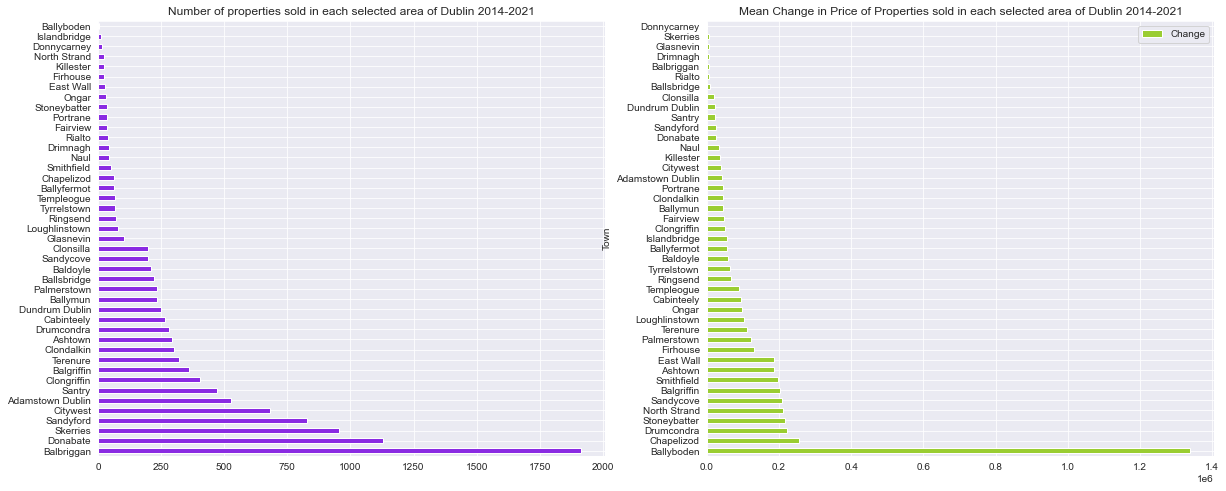

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
dub['Town'].value_counts().plot(kind='barh', color='blueviolet',
                                 title='Number of properties sold in each selected area of Dublin 2014-2021', ax=ax1)
mon.plot.barh(x = 'Town', y = 'Change', ax= ax2, title='Mean Change in Price of Properties sold in each selected area of Dublin 2014-2021',
             color='yellowgreen')
plt.show()

It is very interesting to note some of our outliers here. Ballyboden had a massive change in mean price but that is essentially down to the lack of properties sold with the town designated as "Ballyboden". Most of the rises in means appear to contain a lesser number of properties here. Let's remove some of the areas with lower numbers of properties and plot again.

In [7]:
dub['Town'].value_counts()

Balbriggan          1914
Donabate            1128
Skerries             956
Sandyford            829
Citywest             680
Adamstown Dublin     525
Santry               470
Clongriffin          404
Balgriffin           359
Terenure             320
Clondalkin           302
Ashtown              292
Drumcondra           282
Cabinteely           267
Dundrum Dublin       249
Ballymun             234
Palmerstown          232
Ballsbridge          222
Baldoyle             209
Sandycove            198
Clonsilla            197
Glasnevin            101
Loughlinstown         78
Ringsend              71
Tyrrelstown           68
Templeogue            66
Ballyfermot           65
Chapelizod            62
Smithfield            50
Naul                  44
Drimnagh              43
Rialto                40
Fairview              37
Portrane              35
Stoneybatter          35
Ongar                 30
East Wall             26
Firhouse              25
Killester             24
North Strand          22


In [8]:
dub1 = dub.groupby("Town").filter(lambda x: len(x) > 50)
lst = list(set(dub1['Town']))

In [9]:
mon1 = mon.loc[mon['Town'].isin(lst)]

### Plot again...

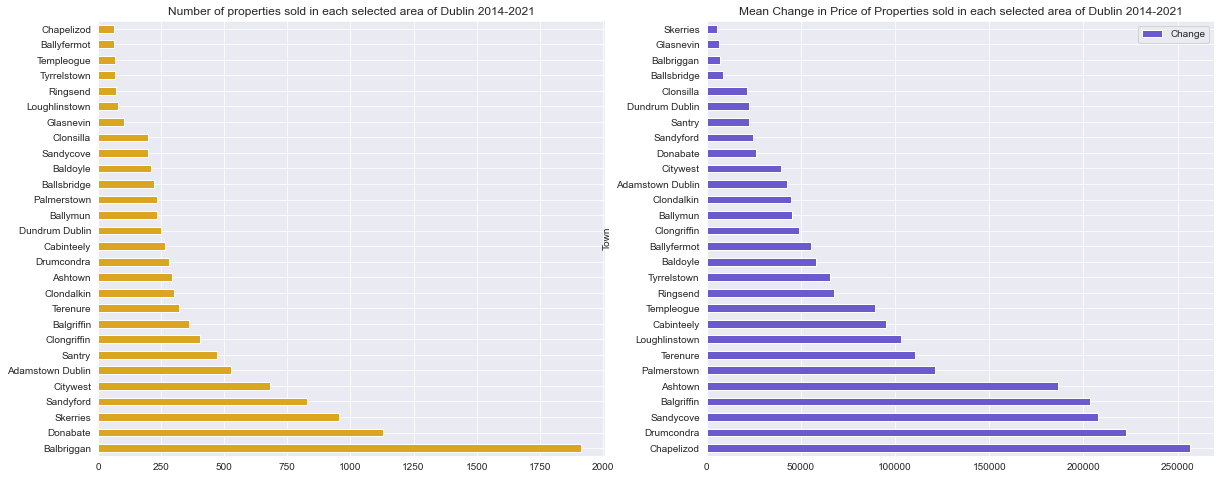

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
dub1['Town'].value_counts().plot(kind='barh', color='goldenrod',
                                 title='Number of properties sold in each selected area of Dublin 2014-2021', ax=ax1)
mon1.plot.barh(x = 'Town', y = 'Change', ax= ax2, title='Mean Change in Price of Properties sold in each selected area of Dublin 2014-2021',
             color='slateblue')
plt.show()

It definitely highlights that the lesser value counts of a town the seemingly larger increase in mean over this period. This would certainly fit into the issue of supply and demand with regards to housing here. We could maybe seek to trim this data even further down now.

In [11]:
# 20000 is definitely a more noticeable increase
mon2 = mon1.loc[mon1['Change'] > 10000]
lst1 = list(set(mon2['Town']))

In [12]:
dub2 = dub1.loc[dub1['Town'].isin(lst1)]

### Let's plot again...

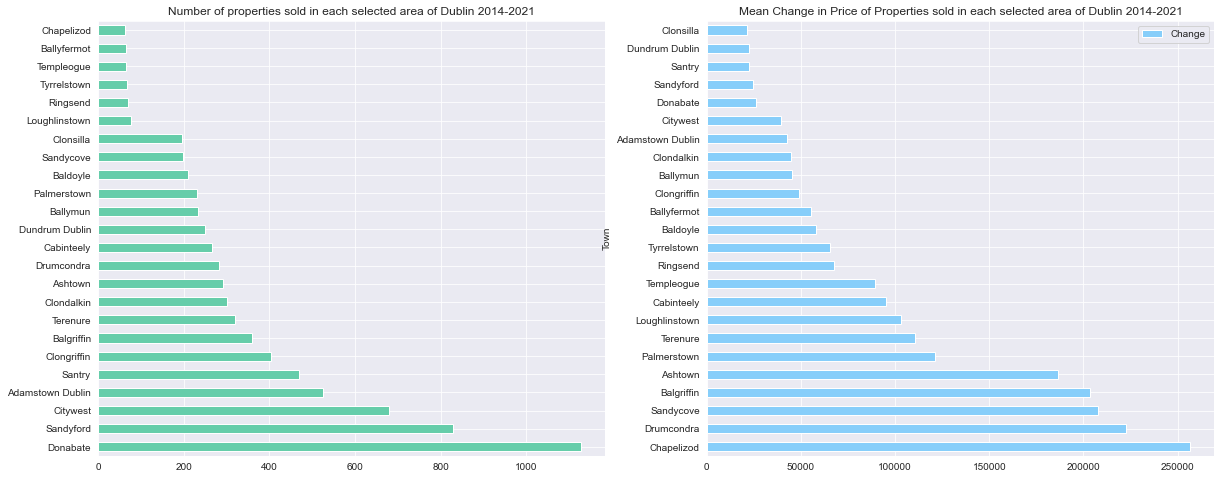

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
dub2['Town'].value_counts().plot(kind='barh', color='mediumaquamarine',
                                 title='Number of properties sold in each selected area of Dublin 2014-2021', ax=ax1)
mon2.plot.barh(x = 'Town', y = 'Change', ax= ax2, title='Mean Change in Price of Properties sold in each selected area of Dublin 2014-2021',
             color='lightskyblue')
plt.show()

This should be definitely enough to work with going forward with reasonable numbers at both lower ends in each plot here.

In [14]:
dub2.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode
207901,"55 College Square, Terenure",Dublin,447200.00,1,0,0,1,2014,1,Terenure,Dublin,0,College Square Terenure,Leinster,Estate,846407.80,D6W
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,1,0,2014,1,Dundrum Dublin,Dublin,0,Sydenham Villas Dundrum Dublin,Leinster,Other,753287.80,A45
207913,"33 Castlegate Green, Adamstown Castle, Adamstown",Dublin,193000.00,1,1,1,2,2014,1,Adamstown Dublin,Dublin,0,Adamstown Castle Adamstown Dublin,Leinster,Estate,365287.80,A42
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,1,0,0,1,2014,1,Templeogue,Dublin,1,Firhouse Road Templeogue,Leinster,Other,371032.55,D6W
207922,"3 Beverton Court, Donabate",Dublin,75000.00,1,1,1,1,2014,1,Donabate,Dublin,0,Beverton Court Donabate,Leinster,Estate,141951.22,K36


In [15]:
dub2.shape

(7587, 17)

In [16]:
# run again tonight
from geopy.geocoders import Nominatim
import time
geolocator = Nominatim(user_agent = "fyp")
add = np.array(dub2['Address'])
add1 = np.array(dub2['Neighbourhood'])
lat2 = []
lon2 = []
for i in range(len(add)):
    time.sleep(1.6)
    location = geolocator.geocode(add[i])
    #print(location.address)
    if location != None:
        #print((location.latitude, location.longitude))
        lat2.append(location.latitude)
        lon2.append(location.longitude)
    else:
        location1 = geolocator.geocode(add1[i])
        if location1 != None:
            lat2.append(location1.latitude)
            lon2.append(location1.longitude)
        else:
            lat2.append("None")
            lon2.append("None")

In [17]:
#test11 = dub2.iloc[3439:]
#test11['Latitude'] = lat2
#test11['Longitude'] = lon2

test11 = dub2.copy()
test11['Latitude'] = lat2
test11['Longitude'] = lon2

In [18]:
test11.head()

,Address,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment,Neighbourhood,Province,Estate,PriceInflation,Eircode,Latitude,Longitude
207901,"55 College Square, Terenure",Dublin,447200.00,1,0,0,1,2014,1,Terenure,Dublin,0,College Square Terenure,Leinster,Estate,846407.80,D6W,53.307878,-6.335665
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,1,0,2014,1,Dundrum Dublin,Dublin,0,Sydenham Villas Dundrum Dublin,Leinster,Other,753287.80,A45,53.288227,-6.238896
207913,"33 Castlegate Green, Adamstown Castle, Adamstown",Dublin,193000.00,1,1,1,2,2014,1,Adamstown Dublin,Dublin,0,Adamstown Castle Adamstown Dublin,Leinster,Estate,365287.80,A42,52.401129,-6.723196
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,1,0,0,1,2014,1,Templeogue,Dublin,1,Firhouse Road Templeogue,Leinster,Other,371032.55,D6W,53.2916,-6.3124
207922,"3 Beverton Court, Donabate",Dublin,75000.00,1,1,1,1,2014,1,Donabate,Dublin,0,Beverton Court Donabate,Leinster,Estate,141951.22,K36,None,None


In [19]:
#d14.to_csv('dubs-geo.csv')

In [20]:
test11.loc[test11['Longitude'] == 'None'].shape

(2181, 19)

In [21]:
test12 = test11.loc[test11['Longitude'] != 'None']

In [22]:
test12.shape

(5406, 19)

In [23]:
#test12.rename(columns={'Longitude': 'Latitude', 'Latitude': 'Longitude'}, inplace = True)

In [24]:
test12['Longitude'].min()

-6.723196450000004

### Distance IFSC

In [25]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [26]:
import geopy.distance
lat_ifsc = 53.349394
lon_ifsc = -6.245863
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
distance = []
for i in range(len(vals)):
    co_ords_2 = (vals[i], vals1[i])
    dist = haversine(lon_ifsc, lat_ifsc, vals[i], vals1[i])
    distance.append(dist)

In [27]:
max(distance)

351.9067475736433

In [28]:
test12['DistanceIFSC'] = distance

C:\Users\user\AppData\Local\Temp/ipykernel_14292/1839790477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test12['DistanceIFSC'] = distance


In [ ]:
test12 = test12.loc[test12['DistanceIFSC'] < 25]

In [29]:
#test12.loc[test12['DistanceIFSC'] < 5]

### Closest School

In [30]:
prim = pd.read_csv('primary_schools_2013_2014.csv')

In [31]:
prim.head()

,AIRO_ID,Roll_No,Off_Name,Add_1,Add_2,Add_3,Add_4,County,Ethos,Island,DEIS,Gaeltacht,M_13_14,F_13_14,T_13_14,xcoord,ycoord,Long,Lat
0,1,00651R,BORRIS MXD N S,BORRIS,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,100,94,194,273199.0,150324.0,-6.91956,52.5993
1,2,00977B,BALLYCONNELL N S,Ballyconnell,Tullow,Co Carlow,NaN,Carlow,CATHOLIC,N,N,N,80,79,159,292481.0,174367.0,-6.62828,52.8124
2,3,01116A,BAILE AN CHUILINN N S,MUINEBEAG,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,56,55,111,272463.0,155784.0,-6.92923,52.6485
3,4,01215C,NEWTOWN DUNLECKNEY MXD,MUINEBEAG,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,69,61,130,275959.0,164072.0,-6.87567,52.7225
4,5,01415K,RATHOE NS,RATHOE,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,92,86,178,281027.0,171359.0,-6.79887,52.7872


In [32]:
prim = prim.loc[prim['County'] == 'Dublin']

In [33]:
prim = prim[['Off_Name', 'Add_1', 'County', 'Ethos', 'Long', 'Lat']]

In [34]:
prim

,Off_Name,Add_1,County,Ethos,Long,Lat
752,CENTRAL SENIOR MXD N S,MARLBORO ST,Dublin,CATHOLIC,-6.25505,53.3512
753,CENTRAL INFS SCHOOL,MARLBORO ST,Dublin,CATHOLIC,-6.25492,53.3510
754,NAOMH PADRAIG BOYS,CAMBRIDGE ROAD,Dublin,CATHOLIC,-6.22435,53.3432
755,SCOIL AN CROI NAOFA,GLASNEVIN,Dublin,CATHOLIC,-6.27337,53.3839
756,PRESENTATION PRIMARY SCHOOL,GEORGES HILL,Dublin,CATHOLIC,-6.27083,53.3481
...,...,...,...,...,...,...
1187,Scoil Niamh Community National School,Fortunestown Lane,Dublin,MULTI DENOMINATIONAL,-6.43635,53.2838
1188,City West Educate Together National School,City West,Dublin,MULTI DENOMINATIONAL,-6.43635,53.2838
1189,Firhouse Educate Together National School,c/o Tymon Bawn Community Centre,Dublin,MULTI DENOMINATIONAL,-6.36575,53.2754
1190,Gaelscoil na Giúise,Ionad Pobail Theach na Giúise,Dublin,MULTI DENOMINATIONAL,-6.33773,53.2767


In [56]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
schoollon = np.array(prim['Long'])
schoollat = np.array(prim['Lat'])
distance = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances = []
    for j in range(len(schoollat)): # B
        lat2 = schoollat[j]
        lon2 = schoollon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances.append(dist)

    min_distance = min(distances)
    distance.append(min_distance)
    #min_index = distances.index(min_distance)

In [57]:
len(distance)

5386

In [58]:
test12.shape

(5386, 17)

In [59]:
test12['DistanceSchool'] = distance

In [60]:
test12.head()

,Address,County,Price (€),VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,Latitude,Longitude,DistanceIFSC,DistanceSchool
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,College Square Terenure,846407.80,D6W,53.307878,-6.335665,7.541595,0.492120
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,Sydenham Villas Dundrum Dublin,753287.80,A45,53.288227,-6.238896,6.817210,0.100996
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,Firhouse Road Templeogue,371032.55,D6W,53.2916,-6.3124,7.799393,0.683556
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,Palmerstown Avenue Palmerstown,179804.88,D20,53.353853,-6.372213,8.400802,0.319564
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,Church Road Drumcondra,287687.80,D09,53.366311,-6.263792,2.225835,0.085034


In [61]:
test12.columns

Index(['Address', 'County', 'Price (€)', 'VAT Exclusive',
       'Description of Property', 'Property Size Description', 'Year', 'Month',
       'Town', 'Apartment', 'Neighbourhood', 'PriceInflation', 'Eircode',
       'Latitude', 'Longitude', 'DistanceIFSC', 'DistanceSchool'],
      dtype='object')

In [41]:
test12.drop(columns = ['Estate', 'Not Full Market Price', 'Region', 'Province'], inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
test12.head()

,Address,County,Price (€),VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,Latitude,Longitude,DistanceIFSC,DistanceSchool
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,College Square Terenure,846407.80,D6W,53.307878,-6.335665,7.541595,0.492120
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,Sydenham Villas Dundrum Dublin,753287.80,A45,53.288227,-6.238896,6.817210,0.100996
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,Firhouse Road Templeogue,371032.55,D6W,53.2916,-6.3124,7.799393,0.683556
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,Palmerstown Avenue Palmerstown,179804.88,D20,53.353853,-6.372213,8.400802,0.319564
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,Church Road Drumcondra,287687.80,D09,53.366311,-6.263792,2.225835,0.085034


### Bus Stops

In [44]:
bus = pd.read_csv('dublinbusstops.csv')

In [45]:
bus = bus[['Name without locality', 'Name', 'Easting', 'Northing']]

In [46]:
bus = bus.dropna()

In [47]:
bus

,Name without locality,Name,Easting,Northing
0,National Museum,Wolfe Tone Quay,714120.0,734355
1,Law Society,Blackhall Place,714370.0,734501
2,Ophaly Court,Dundrum Road,716921.0,728676
3,Ophaly Court,Dundrum Road,716915.0,728663
4,Hospital,Dundrum Road,716916.0,729284
...,...,...,...,...
5363,Castlegate Way,Adamstown Ave,702328.0,733025
5364,Castlegate Way,Adamstown,702774.0,733107
5365,Castlegate Way,Adamstown,702759.0,733097
5366,Grange Manor Close,Griffeen Avenue,703538.0,733467


In [141]:
bus = bus.loc[bus['Northing'] != '#VALUE!']

In [142]:
bus['Northing'] = bus['Northing'].astype('float64')

C:\Users\user\AppData\Local\Temp/ipykernel_14292/3707681131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['Northing'] = bus['Northing'].astype('float64')


In [162]:
# useless
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(bus['Easting'], bus['Northing'])]
gdf = GeoDataFrame(bus, geometry = geometry, crs = 'EPSG:29903') 
gdf

,Name without locality,Name,Easting,Northing,geometry
0,National Museum,Wolfe Tone Quay,714120.0,734355.0,POINT (714120.000 734355.000)
1,Law Society,Blackhall Place,714370.0,734501.0,POINT (714370.000 734501.000)
2,Ophaly Court,Dundrum Road,716921.0,728676.0,POINT (716921.000 728676.000)
3,Ophaly Court,Dundrum Road,716915.0,728663.0,POINT (716915.000 728663.000)
4,Hospital,Dundrum Road,716916.0,729284.0,POINT (716916.000 729284.000)
...,...,...,...,...,...
5363,Castlegate Way,Adamstown Ave,702328.0,733025.0,POINT (702328.000 733025.000)
5364,Castlegate Way,Adamstown,702774.0,733107.0,POINT (702774.000 733107.000)
5365,Castlegate Way,Adamstown,702759.0,733097.0,POINT (702759.000 733097.000)
5366,Grange Manor Close,Griffeen Avenue,703538.0,733467.0,POINT (703538.000 733467.000)


In [458]:
import utm
def rule(row):
    lat, lon = utm.to_latlon(row["Easting"], row["Northing"], zone_number = 10, zone_letter = 'N')
    return pd.Series({"lat": lat, "long": lon})

In [459]:
#rule(bus)
bus.merge(bus.apply(rule, axis=1), left_index= True, right_index= True)

,Name without locality,Name,Easting,Northing,geometry,lat,long
0,National Museum,Wolfe Tone Quay,714120.0,734355.0,POINT (714120.000 734355.000),6.639855,-121.063212
1,Law Society,Blackhall Place,714370.0,734501.0,POINT (714370.000 734501.000),6.641166,-121.060946
2,Ophaly Court,Dundrum Road,716921.0,728676.0,POINT (716921.000 728676.000),6.588413,-121.038089
3,Ophaly Court,Dundrum Road,716915.0,728663.0,POINT (716915.000 728663.000),6.588296,-121.038143
4,Hospital,Dundrum Road,716916.0,729284.0,POINT (716916.000 729284.000),6.593910,-121.038112
...,...,...,...,...,...,...,...
5363,Castlegate Way,Adamstown Ave,702328.0,733025.0,POINT (702328.000 733025.000),6.628236,-121.169881
5364,Castlegate Way,Adamstown,702774.0,733107.0,POINT (702774.000 733107.000),6.628962,-121.165845
5365,Castlegate Way,Adamstown,702759.0,733097.0,POINT (702759.000 733097.000),6.628872,-121.165981
5366,Grange Manor Close,Griffeen Avenue,703538.0,733467.0,POINT (703538.000 733467.000),6.632191,-121.158925


In [136]:
test12.head()

,Address,County,Price (€),VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,Latitude,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,College Square Terenure,846407.80,D6W,53.307878,-6.335665,7.541595,0.492120,1.438826,2.020029
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,Sydenham Villas Dundrum Dublin,753287.80,A45,53.288227,-6.238896,6.817210,0.100996,2.784711,0.274841
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,Firhouse Road Templeogue,371032.55,D6W,53.2916,-6.3124,7.799393,0.683556,3.098765,3.760897
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,Palmerstown Avenue Palmerstown,179804.88,D20,53.353853,-6.372213,8.400802,0.319564,1.909348,3.576775
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,Church Road Drumcondra,287687.80,D09,53.366311,-6.263792,2.225835,0.085034,0.909828,1.942439


In [65]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Nearest Park
With lockdowns and restrictions meaning public spaces for excerise and leisure gained importance over time, let's add this to our data and see what impact it has

(0.5% improvement)

In [67]:
dcc = pd.read_csv('dccplayingpitches.csv')

In [68]:
dcc.head()

,PARK,AREA,CLUBNAME,LEAGUE
0,ALBERT COLLEGE,NORTH WEST,DRUMCONDRA F.C (Snr),AMATEUR FOOTBALL LEAGUE
1,ALBERT COLLEGE,NORTH WEST,GLASNEVIN AFC,AMATEUR FOOTBALL LEAGUE
2,BEECHILL,SOUTH EAST,BALLSBRIDGE FC,AMATEUR FOOTBALL LEAGUE
3,BELCAMP,NORTH CENTRAL,NEWTOWN CELTIC,AMATEUR FOOTBALL LEAGUE
4,BELCAMP,NORTH CENTRAL,VIANNEY BOYS,AMATEUR FOOTBALL LEAGUE


In [70]:
dcc['PARK'].value_counts()

ST ANNES        19
ST ANNES        15
BRICKFIELDS     11
JOHN PAUL        9
WALKINSTOWN      8
                ..
SPRINGDALE       1
ST. ANNES        1
DONNYCARNEY      1
GALTYMORE        1
ST ANNES         1
Name: PARK, Length: 90, dtype: int64

In [71]:
dcc['PARK'] = dcc['PARK'].str.strip()

In [73]:
dcc['PARK'].value_counts()

ST ANNES            35
BRICKFIELDS         15
BELCAMP             11
ALBERT COLLEGE      10
BUSHY               10
                    ..
POPPINTREE NORTH     1
BENMADIGAN           1
TOLKA VALLEY         1
SUNDRIVE             1
CHERRY ORCHARD       1
Name: PARK, Length: 65, dtype: int64

In [74]:
dcc['PARK'] = dcc['PARK'].str.title()

In [75]:
dcc['PARK'].value_counts()

St Annes            35
Brickfields         15
Belcamp             11
Albert College      10
Bushy               10
                    ..
Poppintree North     1
Benmadigan           1
Tolka Valley         1
Sundrive             1
Cherry Orchard       1
Name: PARK, Length: 65, dtype: int64

In [85]:
val = pd.DataFrame(list(set(dcc['PARK'])))
val.rename(columns={0: 'Park'}, inplace = True)
val

,Park
0,Sundrive
1,Dundaniel
2,Oscar Traynor
3,Ringsend
4,St. Annes
...,...
60,Fr. Collins
61,Plunkett Avenue
62,Clonturk
63,Naul


In [212]:
geolocator = Nominatim(user_agent = "fyp")
values = np.array(val['Park'])
latpark = []
lonpark = []
for i in range(len(values)):
    string = values[i] + " Park"
    location = geolocator.geocode(string)
    if location != None:
        latpark.append(location.latitude)
        lonpark.append(location.longitude)
    else:
        latpark.append('None')
        lonpark.append('None')

In [405]:
#latpark

In [96]:
val['Latitude'] = latpark
val['Longitude'] = lonpark

In [98]:
val = val.loc[val['Latitude'] != 'None']
val

,Park,Latitude,Longitude
0,Sundrive,53.321002,-6.291304
1,Dundaniel,53.400079,-6.226484
2,Oscar Traynor,53.397337,-6.217526
3,Ringsend,53.341613,-6.221503
4,St. Annes,52.211641,-6.496885
...,...,...,...
60,Fr. Collins,53.405412,-6.160651
61,Plunkett Avenue,-26.187508,27.989036
62,Clonturk,53.368229,-6.250461
63,Naul,52.414193,-1.518399


In [101]:
val1 = val.loc[(val['Latitude'] > 53) & (val['Latitude'] < 54)]

In [102]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
parklon = np.array(val1['Longitude'])
parklat = np.array(val1['Latitude'])
distance_park = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_park = []
    for j in range(len(parklat)): # B
        lat2 = parklat[j]
        lon2 = parklon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_park.append(dist)

    min_distance = min(distances_park)
    distance_park.append(min_distance)
    #min_index = distances.index(min_distance)

In [105]:
len(distance_park)

5386

In [107]:
max(distance_park)

10.479233194327191

In [109]:
test12['DistancePark'] = distance_park

In [111]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Luas Stops

(accuracy drops 1%)

In [118]:
luas = pd.read_csv('luasstopnames.csv')
luas.head()

,Stop_English,Stop_Irish,Latitude,Longitude
0,Saggart,Teach Sagard,53.284679,-6.437763
1,Fortunestown,Baile Uí Fhoirtcheirn,53.284251,-6.424602
2,Citywest Campus,Campas Gnó Iarthar na Cathrach,53.287833,-6.418915
3,Cheeverstown,Baile an tSíbhrigh,53.290982,-6.406849
4,Fettercairn,Fothair Chardain,53.293519,-6.395554


In [113]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
luaslon = np.array(luas['Longitude'])
luaslat = np.array(luas['Latitude'])
distance_luas = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_luas = []
    for j in range(len(luaslat)): # B
        lat2 = luaslat[j]
        lon2 = luaslon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_luas.append(dist)

    min_distance = min(distances_luas)
    distance_luas.append(min_distance)

In [115]:
#distance_luas

In [117]:
test12['DistanceLuas'] = distance_luas

In [119]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Secondary Schools
1% improvement

In [192]:
sec = pd.read_csv('post-primary-schools-2019-2020-dub.csv')

In [216]:
sec.head()

,Official School Name,Address 1,Address 2,Address 3,County,Local Authority,Eircode,Fee Paying School (Y/N),School Gender - Post Primary,Post Primary School Type,Ethos/Religion
0,Loreto Secondary School,Brick Lane,Balbriggan,Co Dublin,Dublin,Fingal County Council,K32R248,N,Girls,Secondary,CATHOLIC
1,St Marys Secondary School,Baldoyle,D13 W208,NaN,Dublin,Fingal County Council,D13W208,N,Girls,Secondary,CATHOLIC
2,Blackrock College,Blackrock College,Co Dublin,NaN,Dublin,Dun Laoghaire Rathdown,A94FK84,Y,Boys,Secondary,CATHOLIC
3,Willow Park School,Rock Road,Blackrock,Co Dublin,Dublin,Dun Laoghaire Rathdown,A94TW98,Y,Boys,Secondary,CATHOLIC
4,Coláiste Eoin,Baile an Bhóthair,Bóthair Stigh Lorgan,Co. Átha Cliath,Dublin,Dun Laoghaire Rathdown,A94E122,N,Boys,Secondary,CATHOLIC


In [250]:
geolocator.geocode('Rock Road Blackrock Dublin')

Location(Rock Road, Intake, Blackrock-Williamstown ED, Blackrock, Dún Laoghaire-Rathdown, County Dublin, Leinster, A94 X2C6, Éire / Ireland, (53.308149, -6.1949437, 0.0))

In [302]:
add = []
#add1 = np.array(sec['Official School Name'])
add2 = np.array(sec['Address 1'])
for i in range(len(add2)):
    string = str(add2[i]) + " " + " Dublin"
    add.append(string.title())

In [303]:
#add

In [304]:
sec['Full Address'] = add

In [305]:
sec.head()

,Official School Name,Address 1,Address 2,Address 3,County,Local Authority,Eircode,Fee Paying School (Y/N),School Gender - Post Primary,Post Primary School Type,Ethos/Religion,Full Address,Latitude,Longitude
0,Loreto Secondary School,Brick Lane,Balbriggan,Co Dublin,Dublin,Fingal County Council,K32R248,N,Girls,Secondary,CATHOLIC,Brick Lane Dublin,53.612818,-6.184802
1,St Marys Secondary School,Baldoyle,D13 W208,NaN,Dublin,Fingal County Council,D13W208,N,Girls,Secondary,CATHOLIC,Baldoyle Dublin,None,None
2,Blackrock College,Blackrock College,Co Dublin,NaN,Dublin,Dun Laoghaire Rathdown,A94FK84,Y,Boys,Secondary,CATHOLIC,Blackrock College Dublin,53.304715,-6.192405
3,Willow Park School,Rock Road,Blackrock,Co Dublin,Dublin,Dun Laoghaire Rathdown,A94TW98,Y,Boys,Secondary,CATHOLIC,Rock Road Dublin,None,None
4,Coláiste Eoin,Baile an Bhóthair,Bóthair Stigh Lorgan,Co. Átha Cliath,Dublin,Dun Laoghaire Rathdown,A94E122,N,Boys,Secondary,CATHOLIC,Baile An Bhóthair Dublin,53.301951,-6.204838


In [306]:
geolocator = Nominatim(user_agent = "fyp")
sec_school = np.array(sec['Full Address'])
latsec = []
lonsec = []
for i in range(len(sec_school)):
    string = sec_school[i]
    location = geolocator.geocode(string)
    if location != None:
        latsec.append(location.latitude)
        lonsec.append(location.longitude)
    else:
        latsec.append('None')
        lonsec.append('None')

In [307]:
#latsec

In [308]:
sec.shape

(183, 14)

In [309]:
sec['Latitude'] = latsec
sec['Longitude'] = lonsec

In [310]:
sec1 = sec.loc[sec['Latitude'] != 'None']

In [311]:
sec1.shape

(170, 14)

In [319]:
sec1.head()

,Official School Name,Address 1,Address 2,Address 3,County,Local Authority,Eircode,Fee Paying School (Y/N),School Gender - Post Primary,Post Primary School Type,Ethos/Religion,Full Address,Latitude,Longitude
0,Loreto Secondary School,Brick Lane,Balbriggan,Co Dublin,Dublin,Fingal County Council,K32R248,N,Girls,Secondary,CATHOLIC,Brick Lane Dublin,53.612206,-6.186540
1,St Marys Secondary School,Baldoyle,D13 W208,NaN,Dublin,Fingal County Council,D13W208,N,Girls,Secondary,CATHOLIC,Baldoyle Dublin,53.395830,-6.128550
2,Blackrock College,Blackrock College,Co Dublin,NaN,Dublin,Dun Laoghaire Rathdown,A94FK84,Y,Boys,Secondary,CATHOLIC,Blackrock College Dublin,53.304715,-6.192405
3,Willow Park School,Rock Road,Blackrock,Co Dublin,Dublin,Dun Laoghaire Rathdown,A94TW98,Y,Boys,Secondary,CATHOLIC,Rock Road Dublin,53.308149,-6.194944
4,Coláiste Eoin,Baile an Bhóthair,Bóthair Stigh Lorgan,Co. Átha Cliath,Dublin,Dun Laoghaire Rathdown,A94E122,N,Boys,Secondary,CATHOLIC,Baile An Bhóthair Dublin,53.308629,-6.196652


In [313]:
sec1['Latitude'] = sec1['Latitude'].astype('float64')
sec1['Longitude'] = sec1['Longitude'].astype('float64')

C:\Users\user\AppData\Local\Temp/ipykernel_14292/4069311069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec1['Latitude'] = sec1['Latitude'].astype('float64')
C:\Users\user\AppData\Local\Temp/ipykernel_14292/4069311069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec1['Longitude'] = sec1['Longitude'].astype('float64')


In [314]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
seclon = np.array(sec1['Longitude'])
seclat = np.array(sec1['Latitude'])
distance_sec = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_sec = []
    for j in range(len(seclat)): # B
        lat2 = seclat[j]
        lon2 = seclon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_sec.append(dist)

    min_distance = min(distances_sec)
    distance_sec.append(min_distance)

In [315]:
test12['DistanceSecSchool'] = distance_sec

In [317]:
max(distance_sec)

3.532329838016618

In [318]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Distance GPO
Essentially city centre , check importance of distance to main shopping areas etc.

In [320]:
lat_gpo = 53.350140
lon_gpo = -6.266155
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
distance_gpo = []
for i in range(len(vals)):
    dist = haversine(lon_gpo, lat_gpo, vals[i], vals1[i])
    distance_gpo.append(dist)

In [322]:
min(distance_gpo)

1.3638696657229459

In [323]:
max(distance_gpo)

19.10470856794134

In [324]:
test12['DistanceGPO'] = distance_gpo

In [341]:
#test12.to_csv('initial-ml-test-dub-1.csv')

In [342]:
### new property (description of property) is down as 0, 1 means second hand dwelling

In [365]:
test12.rename(columns={'New/Old': 'UsedProperty'}, inplace = True)

In [366]:
test12.head(1)

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,PriceInflation,Eircode,Latitude,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO
207901,"55 College Square, Terenure",Dublin,447200.0,0,0,1,2014,1,Terenure,0,...,846407.8,D6W,53.307878,-6.335665,7.541595,0.49212,1.438826,2.020029,0.156609,6.587209


In [367]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Nearest Hospital

In [368]:
hos = pd.read_csv('hospitals.csv')

In [369]:
hos.head(1)

,Hospital,Lat,Long
0,Children's Health Ireland,53.388,-6.3672


In [382]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
hoslon = np.array(hos['Long'])
hoslat = np.array(hos['Lat'])
distance_hos = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_hos = []
    for j in range(len(hoslat)): # B
        lat2 = hoslat[j]
        lon2 = hoslon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_hos.append(dist)

    min_distance = min(distances_hos)
    distance_hos.append(min_distance)

In [383]:
test12['DistanceHospital'] = distance_hos

In [385]:
max(distance_hos)

13.792135072853485

In [386]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Nearest Beach

In [387]:
be = pd.read_csv('fccbeaches.csv')

In [404]:
be.head(1)

,NAME,LAT,LONG
0,Loughshinny,53.545531,-6.079579


In [390]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
belon = np.array(be['LONG'])
belat = np.array(be['LAT'])
distance_be = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_be = []
    for j in range(len(belat)): # B
        lat2 = belat[j]
        lon2 = belon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_be.append(dist)

    min_distance = min(distances_be)
    distance_be.append(min_distance)

In [391]:
test12['DistanceBeach'] = distance_be

In [392]:
min(distance_be)

1.0913266075411827

In [393]:
max(distance_be)

24.905897865600902

In [394]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Multistorey Car Parks
- no real change

In [396]:
car = pd.read_csv('car_parks_location.csv')

In [397]:
car.head(1)

,Site,Latitude,Longitude
0,BTHOMAS,53.342633,-6.261467


In [399]:
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
carlon = np.array(car['Longitude'])
carlat = np.array(car['Latitude'])
distance_car = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_car = []
    for j in range(len(carlat)):
        lat2 = carlat[j]
        lon2 = carlon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_car.append(dist)

    min_distance = min(distances_car)
    distance_car.append(min_distance)

In [400]:
test12['DistanceCar'] = distance_car

In [401]:
min(distance_car)

0.8994405520441338

In [402]:
max(distance_car)

18.540254128690652

In [414]:
#test12.to_csv('initial-ml-test-dub-1.csv')

In [415]:
#cleanup_nums_prop = {"Property Size Description": {"less than 38 sq metres": 0, "greater than or equal to 38 sq metres and less than 125 sq metres": 1,
#                                                  "greater than or equal to 125 sq metres": 2}}

## These were interpolated, might be best to remove?

### Shopping centres

In [461]:
shop = pd.read_csv('shop-centres.csv')
vals = np.array(test12['Longitude'])
vals1 = np.array(test12['Latitude'])
shoplon = np.array(shop['Longitude'])
shoplat = np.array(shop['Latitude'])
distance_shop = []
for i in range(len(vals)):
    lat1 = vals1[i]
    lon1 = vals[i]
    distances_shop = []
    for j in range(len(shoplat)):
        lat2 = shoplat[j]
        lon2 = shoplon[j]
        dist = haversine(lon1, lat1, lon2, lat2)
        distances_shop.append(dist)

    min_distance = min(distances_shop)
    distance_shop.append(min_distance)

In [463]:
max(distance_shop)

8.47891720462965

In [464]:
test12['DistanceShops'] = distance_shop

In [465]:
#test12.to_csv('initial-ml-test-dub-1.csv')

### Plot locations of our rows

In [418]:
import geopandas as gpd
dub_map = gpd.read_file('dublin_boundary_shape\dublin_boundary_epsg_2157.shp')  #reading the shape file for our maps 
dub_map.head()

,COUNTY,geometry
0,DUBLIN,"MULTIPOLYGON (((720000.737 730675.616, 720011...."


In [419]:
test12.head(1)

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar
207901,"55 College Square, Terenure",Dublin,447200.0,0,0,1,2014,1,Terenure,0,...,-6.335665,7.541595,0.49212,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.4279


In [420]:
i = test12[['County', 'PriceInflation', 'Longitude', 'Latitude']]

<AxesSubplot:>

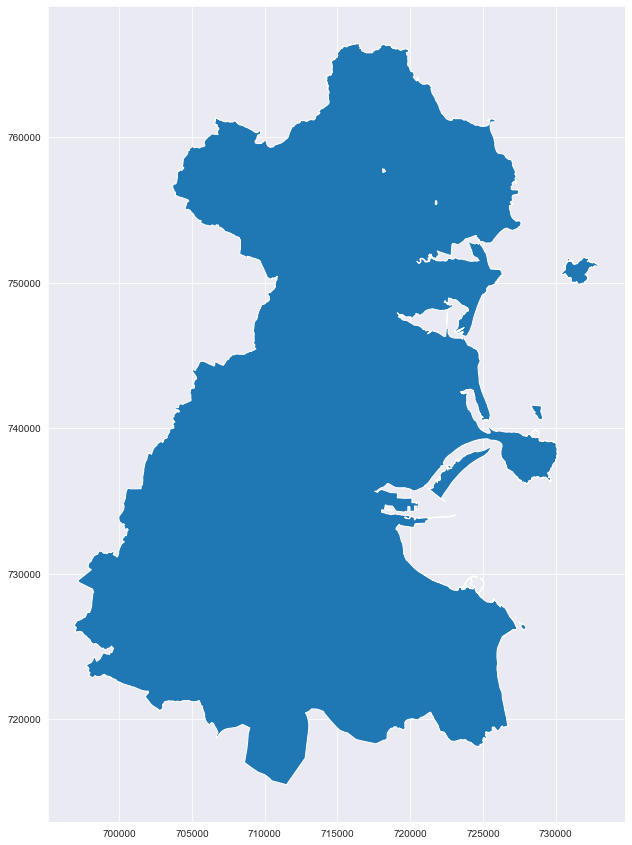

In [427]:
fig, ax = plt.subplots(figsize = (15,15))
dub_map.plot(ax = ax)

In [429]:
crs = {'init': 'epsg: 29902'}

In [430]:
geometry = [Point(xy) for xy in zip( i['Longitude'], i['Latitude'])]
geometry[:5]

In [431]:
geo_df = gpd.GeoDataFrame(i, crs = crs, geometry = geometry)
geo_df.head()

,County,PriceInflation,Longitude,Latitude,geometry
207901,Dublin,846407.80,-6.335665,53.307878,POINT (-6.33567 53.30788)
207905,Dublin,753287.80,-6.238896,53.288227,POINT (-6.23890 53.28823)
207916,Dublin,371032.55,-6.3124,53.2916,POINT (-6.31240 53.29160)
207925,Dublin,179804.88,-6.372213,53.353853,POINT (-6.37221 53.35385)
207929,Dublin,287687.80,-6.263792,53.366311,POINT (-6.26379 53.36631)
